In [4]:
import pandas as pd

df = pd.read_csv( "./data/resale_total.csv" ,low_memory=False)
df

month        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
916982  2024-01      YISHUN     5 ROOM   820      YISHUN ST 81     04 TO 06   
916983  2024-01      YISHUN     5 ROOM   866      YISHUN ST 81     04 TO 06   
916984  2024-01      YISHUN  EXECUTIVE   325       YISHUN CTRL     04 TO 06   
916985  2024-01      YISHUN  EXECUTIVE   356    YISHUN RING RD     04 TO 06   
916986  2024-01      YISHUN  EXECUTIVE   606      YISHUN ST 61     04 TO 06   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                 31.0        IMPROVED                 1977        9000.0   
1                 31.0        IMPROVED                 1977        6000.0   
2                 31.0        IMPROVED                 1977        8000.0   
3                 31.0        IMPROVED                 1977        6000.0   
4                 73.0  NEW GENERATION                 1976       47200.0   
...                ...             ...                  ...           ...   
916982           122.0        Improved                 1988      670002.0   
916983           122.0        Improved                 1988      675000.0   
916984           146.0      Maisonette                 1988      783000.0   
916985           146.0      Maisonette                 1988      860000.0   
916986           142.0       Apartment                 1987      795000.0   

           remaining_lease  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
...                    ...  
916982  63 years 08 months  
916983  63 years 02 months  
916984  63 years 11 months  
916985  63 years 08 months  
916986  62 years 11 months  

[916987 rows x 11 columns]

In [2]:
import os
os.getcwd()
cd ..

'C:\\Users\\priya\\Documents\\end-end_Projects\\HDB_Pricing\\notebooks'

In [168]:
df.describe()

floor_area_sqm  lease_commence_date  resale_price
count   916987.000000        916987.000000  9.169870e+05
mean        95.696409          1988.165542  3.177167e+05
std         25.845091            10.548887  1.678150e+05
min         28.000000          1966.000000  5.000000e+03
25%         73.000000          1981.000000  1.920000e+05
50%         93.000000          1986.000000  2.950000e+05
75%        113.000000          1996.000000  4.138880e+05
max        307.000000          2022.000000  1.500000e+06

In [83]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [95]:
df.nunique(axis=0)

month                    409
town                      27
flat_type                  7
block                   2702
street_name              584
storey_range              25
floor_area_sqm           210
flat_model                34
lease_commence_date       56
resale_price            9372
remaining_lease          767
price_per_sqm          71585
dtype: int64

In [29]:
df.dtypes

month                  period[M]
town                      object
flat_type                 object
block                     object
street_name               object
storey_range              object
floor_area_sqm           float64
flat_model                object
lease_commence_date        int64
resale_price             float64
remaining_lease           object
price_per_sqm            float64
dtype: object

In [5]:
from datetime import datetime
df["month"] = pd.to_datetime(df["month"])
df['month'] = df['month'].dt.to_period('M')

In [6]:
df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']

In [8]:
current_year = datetime.now().year
type(current_year)

int

In [9]:
df['age'] = current_year -  df['lease_commence_date']

In [10]:
df["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [11]:
df["flat_type"]=df["flat_type"].replace({'MULTI GENERATION': 'MULTI-GENERATION'})

In [62]:
df

month        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
916982  2024-01      YISHUN     5 ROOM   820      YISHUN ST 81     04 TO 06   
916983  2024-01      YISHUN     5 ROOM   866      YISHUN ST 81     04 TO 06   
916984  2024-01      YISHUN  EXECUTIVE   325       YISHUN CTRL     04 TO 06   
916985  2024-01      YISHUN  EXECUTIVE   356    YISHUN RING RD     04 TO 06   
916986  2024-01      YISHUN  EXECUTIVE   606      YISHUN ST 61     04 TO 06   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                 31.0        IMPROVED                 1977        9000.0   
1                 31.0        IMPROVED                 1977        6000.0   
2                 31.0        IMPROVED                 1977        8000.0   
3                 31.0        IMPROVED                 1977        6000.0   
4                 73.0  NEW GENERATION                 1976       47200.0   
...                ...             ...                  ...           ...   
916982           122.0        Improved                 1988      670002.0   
916983           122.0        Improved                 1988      675000.0   
916984           146.0      Maisonette                 1988      783000.0   
916985           146.0      Maisonette                 1988      860000.0   
916986           142.0       Apartment                 1987      795000.0   

           remaining_lease  price_per_sqm  age  
0                      NaN     290.322581   47  
1                      NaN     193.548387   47  
2                      NaN     258.064516   47  
3                      NaN     193.548387   47  
4                      NaN     646.575342   48  
...                    ...            ...  ...  
916982  63 years 08 months    5491.819672   36  
916983  63 years 02 months    5532.786885   36  
916984  63 years 11 months    5363.013699   36  
916985  63 years 08 months    5890.410959   36  
916986  62 years 11 months    5598.591549   37  

[916987 rows x 13 columns]

In [57]:
df2 = df["flat_model"].value_counts().rename_axis('flat_model').to_frame('counts')
df2

counts
flat_model                    
Model A                 190695
Improved                165812
New Generation          108907
NEW GENERATION           78898
IMPROVED                 73589
MODEL A                  70381
Premium Apartment        45765
Simplified               33933
Apartment                25263
Standard                 24938
SIMPLIFIED               23258
STANDARD                 17375
Maisonette               17203
MAISONETTE               12215
Model A2                 10023
APARTMENT                 9901
DBSS                      3205
Adjoined flat             1234
Model A-Maisonette        1081
MODEL A-MAISONETTE         982
Terrace                    441
Type S1                    430
MULTI GENERATION           279
Multi Generation           260
TERRACE                    247
Type S2                    213
Premium Apartment Loft     106
2-room                      89
Premium Maisonette          86
Improved-Maisonette         81
IMPROVED-MAISONETTE         44
3Gen                        26
2-ROOM                      21
PREMIUM APARTMENT            6

# Town

In [30]:
len(df["town"].unique())

27

In [36]:
df["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [43]:
df["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

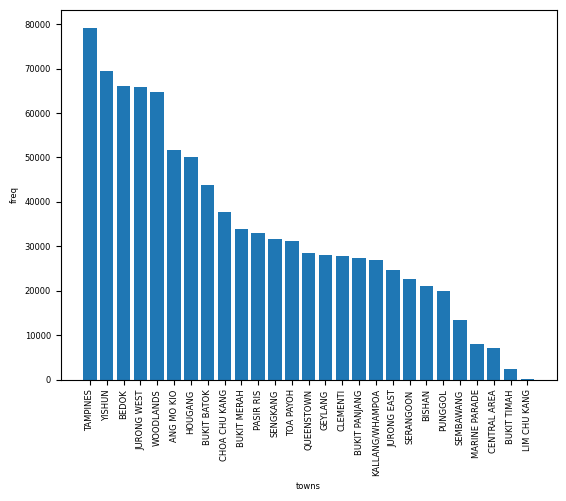

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Category type is needed here
town = df["town"].astype( "category" )
town = town.value_counts()



import numpy as np

# Create a numpy array for the categories
cat = np.array( town.index.values )

# Convert the count table into a numpy array
ht = town.to_numpy()

plt.bar( cat, ht )

plt.xlabel( "towns" )
plt.ylabel( "freq" )
plt.xticks(rotation=90)


plt.show()

In [34]:
df[df["flat_type"]=="1 ROOM"]

month         town flat_type block         street_name storey_range  \
0       1990-01   ANG MO KIO    1 ROOM   309    ANG MO KIO AVE 1     10 TO 12   
1       1990-01   ANG MO KIO    1 ROOM   309    ANG MO KIO AVE 1     04 TO 06   
2       1990-01   ANG MO KIO    1 ROOM   309    ANG MO KIO AVE 1     10 TO 12   
3       1990-01   ANG MO KIO    1 ROOM   309    ANG MO KIO AVE 1     07 TO 09   
410     1990-01  BUKIT MERAH    1 ROOM    33       TAMAN HO SWEE     07 TO 09   
...         ...          ...       ...   ...                 ...          ...   
896620  2023-04  BUKIT MERAH    1 ROOM     7  TELOK BLANGAH CRES     04 TO 06   
898829  2023-05  BUKIT MERAH    1 ROOM     7  TELOK BLANGAH CRES     01 TO 03   
909409  2023-10  BUKIT MERAH    1 ROOM     7  TELOK BLANGAH CRES     01 TO 03   
909410  2023-10  BUKIT MERAH    1 ROOM     7  TELOK BLANGAH CRES     04 TO 06   
911599  2023-11  BUKIT MERAH    1 ROOM     7  TELOK BLANGAH CRES     10 TO 12   

        floor_area_sqm flat_model  lease_commence_date  resale_price  \
0                 31.0   IMPROVED                 1977        9000.0   
1                 31.0   IMPROVED                 1977        6000.0   
2                 31.0   IMPROVED                 1977        8000.0   
3                 31.0   IMPROVED                 1977        6000.0   
410               29.0   IMPROVED                 1969        7300.0   
...                ...        ...                  ...           ...   
896620            31.0   Improved                 1975      240000.0   
898829            31.0   Improved                 1975      251000.0   
909409            31.0   Improved                 1975      243000.0   
909410            31.0   Improved                 1975      229000.0   
911599            31.0   Improved                 1975      258000.0   

           remaining_lease  price_per_sqm  
0                      NaN     290.322581  
1                      NaN     193.548387  
2                      NaN     258.064516  
3                      NaN     193.548387  
410                    NaN     251.724138  
...                    ...            ...  
896620            51 years    7741.935484  
898829  50 years 11 months    8096.774194  
909409  50 years 06 months    7838.709677  
909410  50 years 05 months    7387.096774  
911599  50 years 04 months    8322.580645  

[1300 rows x 12 columns]

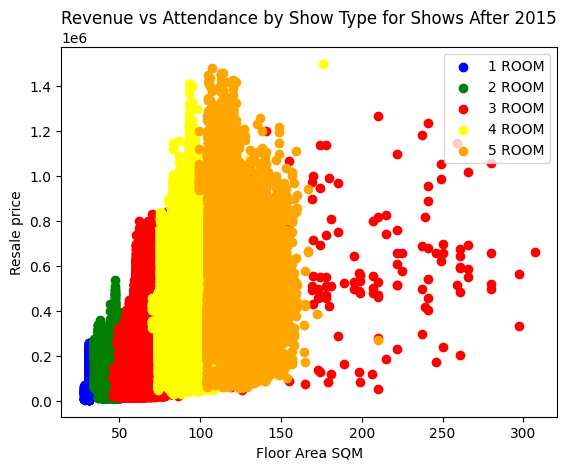

In [42]:
fig, ax = plt.subplots()

# For each subplot, we get the subset of data with the desired show type

# Create a blue scatter plot for Musicals
ax.scatter(   'floor_area_sqm', 'resale_price',c="Blue", label="1 ROOM", data=df[df["flat_type"]=="1 ROOM"] )

# TODO: Create a green scatter plot for Plays
ax.scatter('floor_area_sqm',   'resale_price',c="Green", label="2 ROOM", data=df[df["flat_type"]=="2 ROOM"] )

# TODO: Create a red scatter plot for Specials
ax.scatter(  'floor_area_sqm', 'resale_price',c="Red", label="3 ROOM", data=df[df["flat_type"]=="3 ROOM"] )

ax.scatter(   'floor_area_sqm','resale_price',c="Yellow", label="4 ROOM", data=df[df["flat_type"]=="4 ROOM"] )

ax.scatter( 'floor_area_sqm','resale_price', c="Orange", label="5 ROOM", data=df[df["flat_type"]=="5 ROOM"] )



# Set title
ax.set_title( 'Revenue vs Attendance by Show Type for Shows After 2015')

# TODO: Set x label, y label, legend, and grid as before
ax.set_xlabel( 'Floor Area SQM' )
ax.set_ylabel( 'Resale price' )

ax.legend()
ax.grid( False)

plt.show()

C:\Users\priya\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


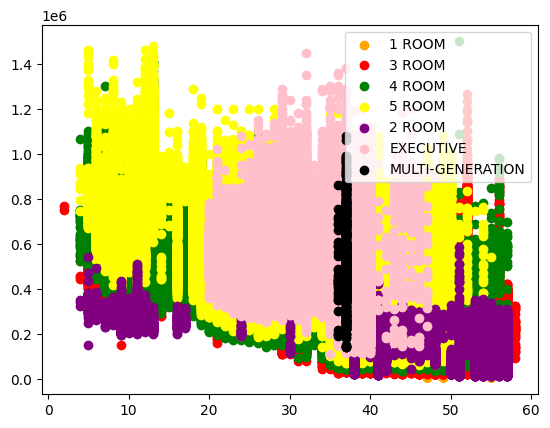

C:\Users\priya\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


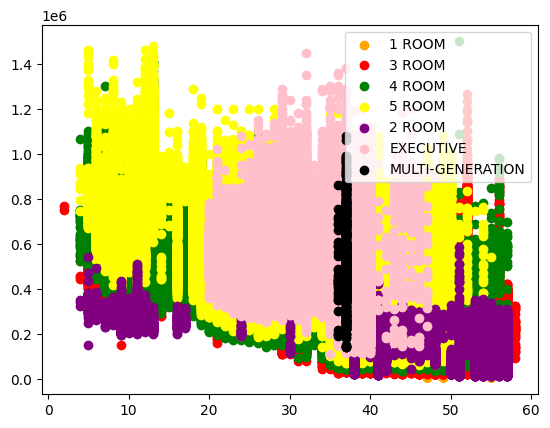

In [53]:
fig, ax = plt.subplots()

class_map = { '1 ROOM':'1 ROOM', '3 ROOM':'3 ROOM', '4 ROOM':'4 ROOM', '5 ROOM':'5 ROOM', '2 ROOM':'2 ROOM', 'EXECUTIVE':"EXECUTIVE",
       'MULTI-GENERATION':'MULTI-GENERATION' }
colors = { '1 ROOM': "orange", '3 ROOM':"Red", '4 ROOM':"green", '5 ROOM':"yellow", '2 ROOM':"purple", 'EXECUTIVE':"pink",
       'MULTI-GENERATION': "black" }

for cls, c in colors.items():
    ax.scatter( 'age','resale_price', c=c, label=class_map[cls], data=df[df["flat_type"]==cls] )
    
# Set title
#ax.set_title( 'Resale Price vs Price per sqm')
#ax.set_xlabel( 'Price per SQM' )
#ax.set_ylabel( 'Resale price' )
#plt.legend()
ax.grid( False)

fig

C:\Users\priya\AppData\Local\Temp\ipykernel_42860\4036426971.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


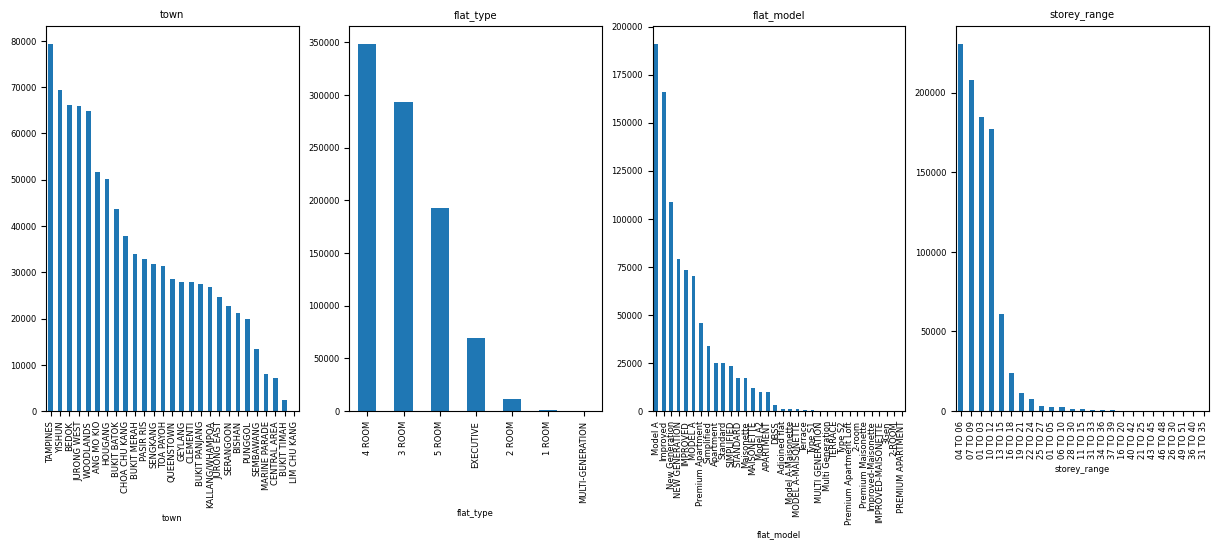

In [99]:
categorical_features = ["town", "flat_type", "flat_model","storey_range"]
fig, ax = plt.subplots(1, len(categorical_features),figsize=(15, 5))
#fig, ax = plt.subplots(2,2,figsize=(15, 5))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()


In [100]:
df.nunique(axis=0)

month                    409
town                      27
flat_type                  7
block                   2702
street_name              584
storey_range              25
floor_area_sqm           210
flat_model                34
lease_commence_date       56
resale_price            9372
remaining_lease          767
price_per_sqm          71585
dtype: int64

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Resale Prices')

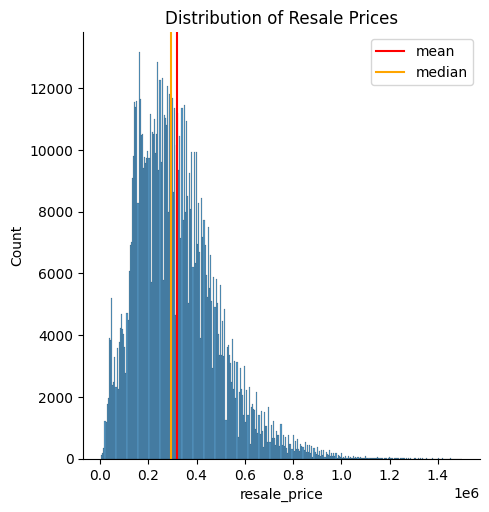

In [24]:
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
sns.displot(df["resale_price"], kde=False)
plt.axvline(x=np.mean(df["resale_price"]), color="red", label= "mean")
plt.axvline(x=np.median(df["resale_price"]), color="orange", label= "median")
plt.legend(loc="upper right")
plt.title("Distribution of Resale Prices")

Text(0, 0.5, 'floor_area_sqm')

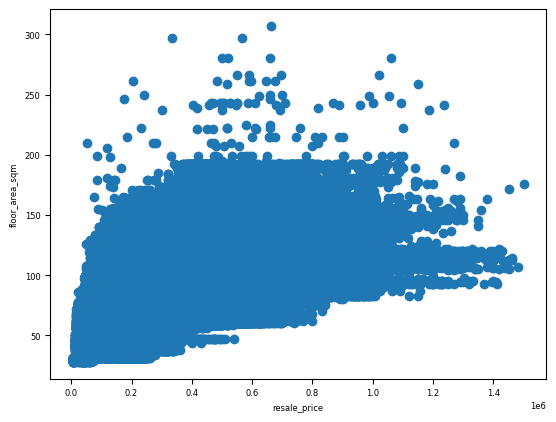

In [58]:
plt.scatter(df['resale_price'],df['floor_area_sqm'])
plt.xlabel("resale_price")
plt.ylabel("Price")

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='resale_price', ylabel='price_per_sqm'>

C:\Users\priya\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\priya\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


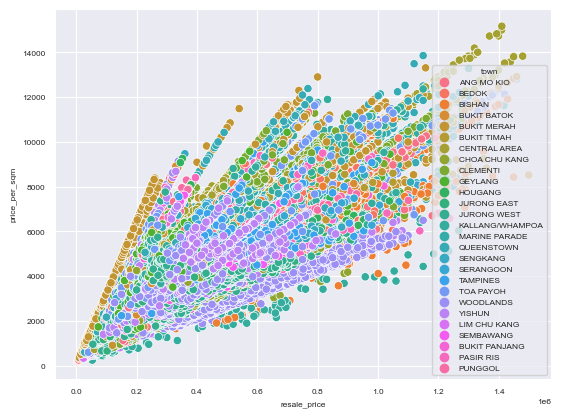

In [124]:
sns.scatterplot(x="resale_price", y="price_per_sqm", hue="town",data=df)


C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\AppData\Local\Temp\ipykernel_42860\895278706.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categoric

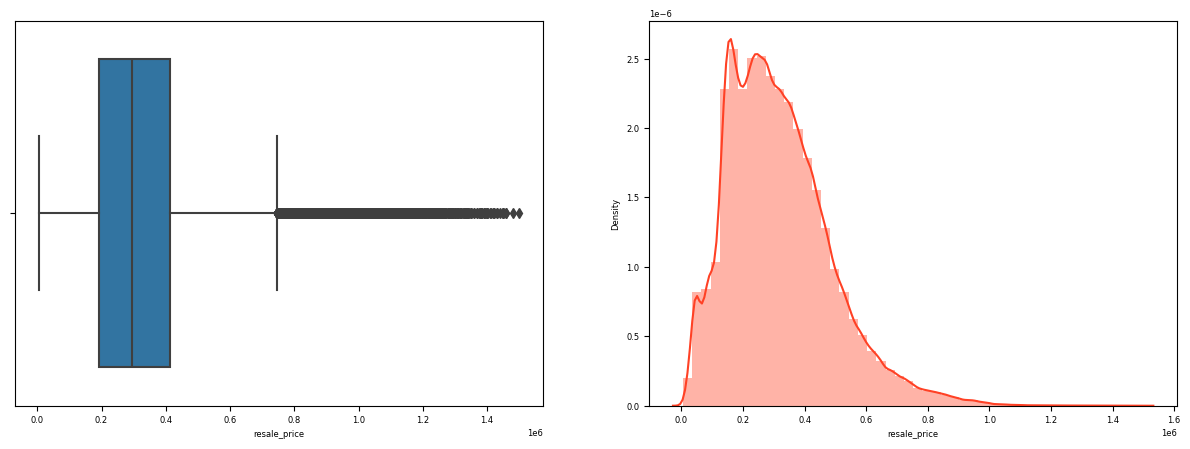

In [60]:
def plot_num(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)
    
    
plot_num('resale_price') 

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\AppData\Local\Temp\ipykernel_42860\895278706.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categoric

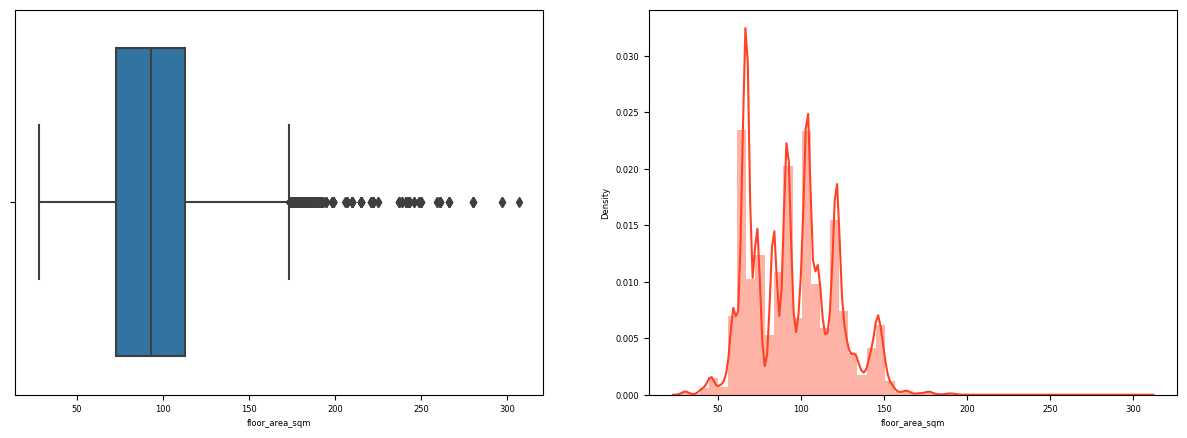

In [61]:
plot_num('floor_area_sqm') 

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

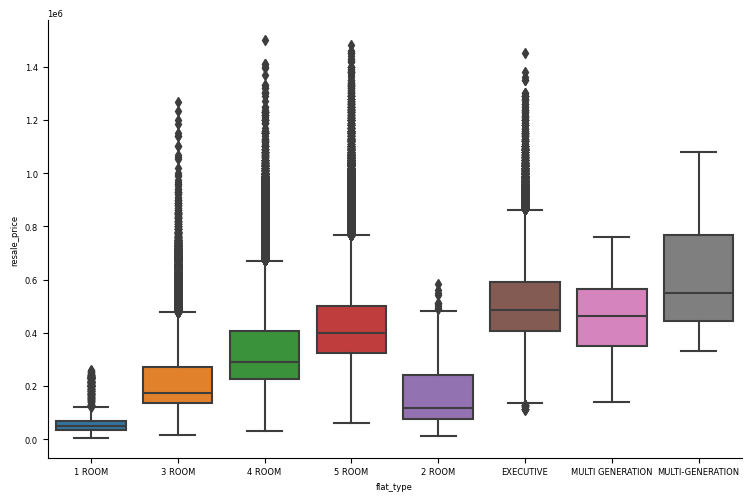

In [64]:
#overall qual
sns.catplot(data=df,x='flat_type',y='resale_price',kind='box',aspect=1.5)

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

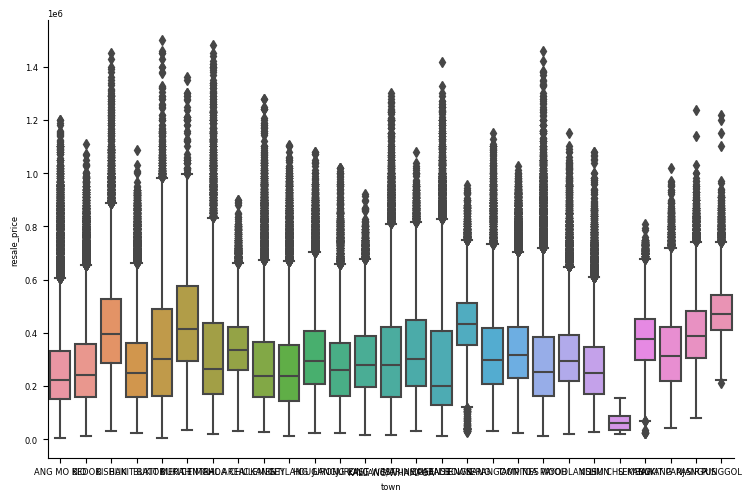

In [65]:
#overall qual
sns.catplot(data=df,x='town',y='resale_price',kind='box',aspect=1.5)

In [29]:
flat.groupby(flat['month'])['resale_price'].mean()

month
1991-04     150000.0
1991-06     180000.0
1992-06     292000.0
1992-07     141000.0
1992-08     245000.0
             ...    
2022-10    1021250.0
2022-11     871500.0
2023-01    1080000.0
2023-06     935000.0
2023-12     975000.0
Freq: M, Name: resale_price, Length: 244, dtype: float64

In [26]:
ft= ['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION']

C:\Users\priya\AppData\Local\Temp\ipykernel_56256\1608895671.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


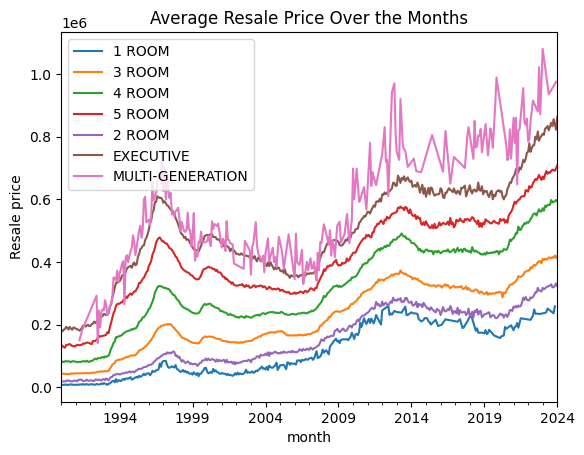

In [28]:

#fig, ax = plt.subplots(1, len(ft),figsize=(15, 5))

fig, ax = plt.subplots()


for ftype in ft:
    flat = df[df["flat_type"] == ftype]
    flat.groupby(flat['month'])['resale_price'].mean().plot()

ax.legend(ft)
        plt.ylabel("Resale price")
        plt.title("Average Resale Price Over the Months")
        fig.show()

In [6]:
by_month = df['month'].value_counts()
by_month

month
1999-03    6465
1999-06    5861
1998-10    5709
1999-04    5698
1999-05    5671
           ... 
1991-02     816
1990-10     810
1990-05     778
2020-04     424
2020-05     363
Freq: M, Name: count, Length: 409, dtype: int64

In [7]:
by_month.index = pd.PeriodIndex(by_month.index)
df_month = by_month.rename_axis('month').reset_index(name='counts')
df_month

month  counts
0    1999-03    6465
1    1999-06    5861
2    1998-10    5709
3    1999-04    5698
4    1999-05    5671
..       ...     ...
404  1991-02     816
405  1990-10     810
406  1990-05     778
407  2020-04     424
408  2020-05     363

[409 rows x 2 columns]

In [183]:
!pip install -U kaleido

In [8]:
import plotly
plotly.__version__

'5.3.1'

In [8]:
import plotly.express as px
import plotly.graph_objs as go
#import kaleido
fig = go.Figure(data=go.Scatter(x=df_month['month'].astype(dtype=str), 
                        y=df_month['counts'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Tweets about Malioboro from Jan 2020 to Jan 2021',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total tweets"},
                   "showlegend": False})
#fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

In [10]:
fig = go.Figure(data=go.Bar(x=df_month['month'].astype(dtype=str), 
                        y=df_month['counts'],
                        marker_color='indianred', text="counts"))


fig.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_42860\1580503675.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


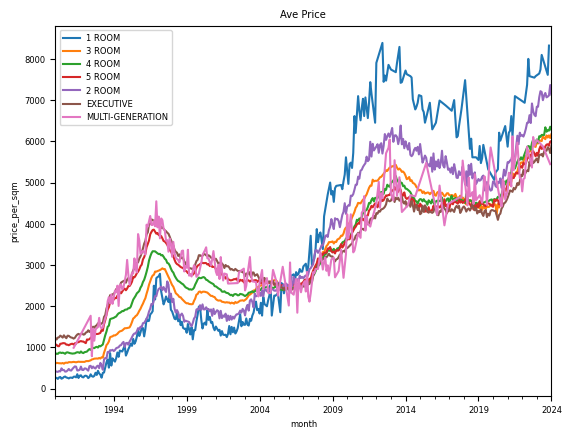

In [113]:
fig, ax = plt.subplots()


for ftype in ft:
    flat = df[df["flat_type"] == ftype]
    flat.groupby(flat['month'])['price_per_sqm'].mean().plot()
ax.legend(ft)
plt.ylabel("price_per_sqm")
plt.title("Ave Price per sqm")
fig.show()

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


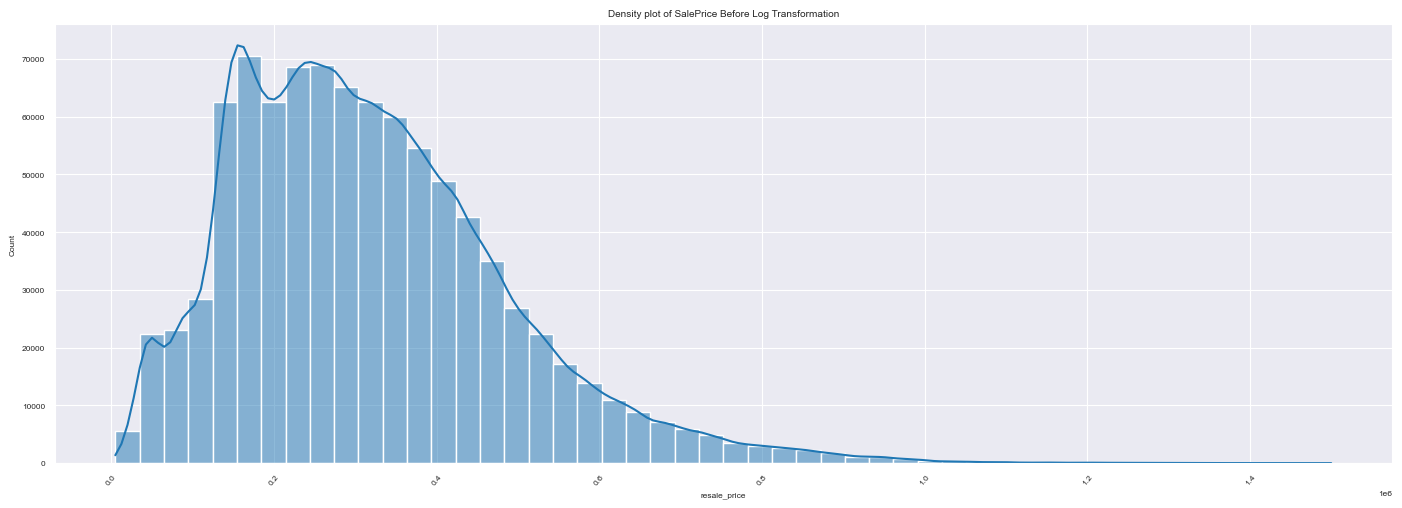

In [115]:
# The Density Plot of SalePrice
plt.figure(figsize=(14,5))
sns.set_style('darkgrid')
sns.histplot(data= df,x='resale_price',bins=50,kde=True)
plt.title("Density plot of SalePrice Before Log Transformation")
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()

In [116]:
sns.scatterplot(x=df.index, y=df["resale_price"],hue=df["storey_range"])

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: ylabel='resale_price'>

C:\Users\priya\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\priya\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Error in callback <function flush_figures at 0x0000027402772D30> (for post_execute):


KeyboardInterrupt: 

# MRT STATIONS

In [12]:
mrt_locations = pd.read_csv("./data/mrt_data.csv")
mrt_locations.drop(columns=['type'], inplace=True)

mrt_locations['lat_long']= mrt_locations[['lat', 'lng']].values.tolist()

mrt_locations

station_name       lat         lng                lat_long
0        Jurong East  1.333207  103.742308  [1.333207, 103.742308]
1        Bukit Batok  1.349069  103.749596  [1.349069, 103.749596]
2       Bukit Gombak  1.359043  103.751863  [1.359043, 103.751863]
3      Choa Chu Kang  1.385417  103.744316  [1.385417, 103.744316]
4            Yew Tee  1.397383  103.747523  [1.397383, 103.747523]
..               ...       ...         ...                     ...
114      Bedok North  1.335268  103.918054  [1.335268, 103.918054]
115  Bedok Reservoir  1.336595  103.933070   [1.336595, 103.93307]
116    Tampines West  1.345583  103.938244  [1.345583, 103.938244]
117    Tampines East  1.356310  103.955471   [1.35631, 103.955471]
118     Upper Changi  1.342218  103.961505  [1.342218, 103.961505]

[119 rows x 4 columns]

In [14]:
from math import sin, cos, sqrt, atan2, radians

def earth_distance(x, y):

  # Approximate radius of earth in km
  R = 6373.0

  lat1, lng1 = radians(x[0]), radians(x[1])
  lat2, lng2 = radians(y[0]), radians(y[1])

  dlon = lng2 - lng1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  return R * c

def euclidean_distance(x, y):
  dx = x[0] - y[0]
  dy = x[1] - y[1]

  return sqrt(dx**2 + dy**2)

jurong_east = [1.333207, 103.742308]
near_amk = [1.365445, 103.842715]
print("Euclidean distance: ", euclidean_distance(jurong_east, near_amk))
print("Realistic distance: ", earth_distance(jurong_east, near_amk))


import warnings
warnings.filterwarnings('ignore')

def get_nearest_mrt(location, lat_lng_ls):
    dists=[]
    for item in lat_lng_ls:
        dists.append(earth_distance(location, item))
    return(dists.index(min(dists)), min(dists))

Euclidean distance:  0.10545546118149039
Realistic distance:  11.726844638513933


In [15]:
df

month        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
916982  2024-01      YISHUN     5 ROOM   820      YISHUN ST 81     04 TO 06   
916983  2024-01      YISHUN     5 ROOM   866      YISHUN ST 81     04 TO 06   
916984  2024-01      YISHUN  EXECUTIVE   325       YISHUN CTRL     04 TO 06   
916985  2024-01      YISHUN  EXECUTIVE   356    YISHUN RING RD     04 TO 06   
916986  2024-01      YISHUN  EXECUTIVE   606      YISHUN ST 61     04 TO 06   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                 31.0        IMPROVED                 1977        9000.0   
1                 31.0        IMPROVED                 1977        6000.0   
2                 31.0        IMPROVED                 1977        8000.0   
3                 31.0        IMPROVED                 1977        6000.0   
4                 73.0  NEW GENERATION                 1976       47200.0   
...                ...             ...                  ...           ...   
916982           122.0        Improved                 1988      670002.0   
916983           122.0        Improved                 1988      675000.0   
916984           146.0      Maisonette                 1988      783000.0   
916985           146.0      Maisonette                 1988      860000.0   
916986           142.0       Apartment                 1987      795000.0   

           remaining_lease  price_per_sqm  age  
0                      NaN     290.322581   47  
1                      NaN     193.548387   47  
2                      NaN     258.064516   47  
3                      NaN     193.548387   47  
4                      NaN     646.575342   48  
...                    ...            ...  ...  
916982  63 years 08 months    5491.819672   36  
916983  63 years 02 months    5532.786885   36  
916984  63 years 11 months    5363.013699   36  
916985  63 years 08 months    5890.410959   36  
916986  62 years 11 months    5598.591549   37  

[916987 rows x 13 columns]

In [17]:
hdb_locations = pd.read_csv("./data/sg_zipcode_mapper_utf.csv")
hdb_locations = hdb_locations.drop('Unnamed: 0', axis=1)
hdb_locations= hdb_locations.drop('postal.1', axis=1)

In [18]:
data=pd.merge(df,hdb_locations, on=['block','street_name'],how="outer")
data

month        town flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-02  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...       ...   ...               ...          ...   
937017      NaT         NaN       NaN     9          FAJAR RD          NaN   
937018      NaT         NaN       NaN    91          SENJA RD          NaN   
937019      NaT         NaN       NaN    13   SERANGOON AVE 3          NaN   
937020      NaT         NaN       NaN     4      BISHAN ST 13          NaN   
937021      NaT         NaN       NaN    10       SENG POH RD          NaN   

        floor_area_sqm flat_model  lease_commence_date  resale_price  \
0                 31.0   IMPROVED               1977.0        9000.0   
1                 31.0   IMPROVED               1977.0        6000.0   
2                 31.0   IMPROVED               1977.0        8000.0   
3                 31.0   IMPROVED               1977.0        6000.0   
4                 31.0   IMPROVED               1977.0        8000.0   
...                ...        ...                  ...           ...   
937017             NaN        NaN                  NaN           NaN   
937018             NaN        NaN                  NaN           NaN   
937019             NaN        NaN                  NaN           NaN   
937020             NaN        NaN                  NaN           NaN   
937021             NaN        NaN                  NaN           NaN   

       remaining_lease  price_per_sqm   age    postal       lat         lng  \
0                  NaN     290.322581  47.0       NaN       NaN         NaN   
1                  NaN     193.548387  47.0       NaN       NaN         NaN   
2                  NaN     258.064516  47.0       NaN       NaN         NaN   
3                  NaN     193.548387  47.0       NaN       NaN         NaN   
4                  NaN     258.064516  47.0       NaN       NaN         NaN   
...                ...            ...   ...       ...       ...         ...   
937017             NaN            NaN   NaN  679002.0  1.379549  103.769313   
937018             NaN            NaN   NaN  677741.0  1.388369  103.765522   
937019             NaN            NaN   NaN  556123.0  1.348407  103.869431   
937020             NaN            NaN   NaN  579792.0  1.347091  103.854878   
937021             NaN            NaN   NaN  168895.0  1.285903  103.834011   

                                    searchval  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
...                                       ...   
937017                ZHENGHUA PRIMARY SCHOOL   
937018              ZHENGHUA SECONDARY SCHOOL   
937019              ZHONGHUA SECONDARY SCHOOL   
937020  ZION BISHAN BIBLE PRESBYTERIAN CHURCH   
937021                     ZION SPORTS CORNER   

                                     building  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
...                                       ...   
937017                ZHENGHUA PRIMARY SCHOOL   
937018              ZHENGHUA SECONDARY SCHOOL   
937019              ZHONGHUA SECONDARY SCHOOL   
937020  ZION BISHAN BIBLE PRESBYTERIAN CHURCH   
937021                     ZION SPORTS CORNER   

                                                  address  
0                    

In [19]:
data=data.dropna()
data.reset_index(drop=True, inplace=True)
data

month         town flat_type block          street_name  \
0       2015-09   ANG MO KIO    3 ROOM   216     ANG MO KIO AVE 1   
1       2016-08   ANG MO KIO    3 ROOM   216     ANG MO KIO AVE 1   
2       2016-08   ANG MO KIO    3 ROOM   216     ANG MO KIO AVE 1   
3       2016-08   ANG MO KIO    3 ROOM   216     ANG MO KIO AVE 1   
4       2017-03   ANG MO KIO    3 ROOM   216     ANG MO KIO AVE 1   
...         ...          ...       ...   ...                  ...   
204245  2023-12    TOA PAYOH    4 ROOM   264       TOA PAYOH EAST   
204246  2024-01    TOA PAYOH    4 ROOM   264       TOA PAYOH EAST   
204247  2024-01  BUKIT BATOK    4 ROOM  437A  BT BATOK WEST AVE 5   
204248  2024-01  BUKIT BATOK    5 ROOM  439C  BT BATOK WEST AVE 8   
204249  2024-01     TAMPINES    3 ROOM  606A       TAMPINES ST 61   

       storey_range  floor_area_sqm      flat_model  lease_commence_date  \
0          07 TO 09            73.0  New Generation               1976.0   
1          07 TO 09            73.0  New Generation               1976.0   
2          10 TO 12            73.0  New Generation               1976.0   
3          04 TO 06            73.0  New Generation               1976.0   
4          07 TO 09            73.0  New Generation               1976.0   
...             ...             ...             ...                  ...   
204245     22 TO 24            93.0         Model A               2019.0   
204246     25 TO 27            93.0         Model A               2019.0   
204247     07 TO 09            93.0         Model A               2020.0   
204248     07 TO 09           113.0        Improved               2020.0   
204249     10 TO 12            68.0         Model A               2020.0   

        resale_price     remaining_lease  price_per_sqm   age    postal  \
0           317000.0                  59    4342.465753  48.0  560216.0   
1           308000.0                  58    4219.178082  48.0  560216.0   
2           318000.0                  58    4356.164384  48.0  560216.0   
3           325000.0                  58    4452.054795  48.0  560216.0   
4           310000.0   58 years 01 month    4246.575342  48.0  560216.0   
...              ...                 ...            ...   ...       ...   
204245      950000.0   95 years 01 month   10215.053763   5.0  310264.0   
204246     1000088.0            95 years   10753.634409   5.0  310264.0   
204247      612000.0  95 years 02 months    6580.645161   4.0  651437.0   
204248      793000.0  95 years 02 months    7017.699115   4.0  653439.0   
204249      540000.0  95 years 03 months    7941.176471   4.0  521606.0   

             lat         lng             searchval              building  \
0       1.366197  103.841505         ANG MO KIO 22         ANG MO KIO 22   
1       1.366197  103.841505         ANG MO KIO 22         ANG MO KIO 22   
2       1.366197  103.841505         ANG MO KIO 22         ANG MO KIO 22   
3       1.366197  103.841505         ANG MO KIO 22         ANG MO KIO 22   
4       1.366197  103.841505         ANG MO KIO 22         ANG MO KIO 22   
...          ...         ...                   ...                   ...   
204245  1.332465  103.855238        TOA PAYOH APEX        TOA PAYOH APEX   
204246  1.332465  103.855238        TOA PAYOH APEX        TOA PAYOH APEX   
204247  1.358174  103.739218  WEST EDGE @ BT BATOK  WEST EDGE @ BT BATOK   
204248  1.357629  103.738857  WEST EDGE @ BT BATOK  WEST EDGE @ BT BATOK   
204249  1.362377  103.936587  TAMPINES GREENRIDGES  TAMPINES GREENRIDGES   

                                                  address  
0       216 ANG MO KIO AVE 1 ANG MO KIO 22 SINGAPORE 5...  
1       216 ANG MO KIO AVE 1 ANG MO KIO 22 SINGAPORE 5...  
2       216 ANG MO KIO AVE 1 ANG MO KIO 22 SINGAPORE 5...  
3       216 ANG MO KIO AVE 1 ANG MO KIO 22 SINGAPORE 5...  
4       216 ANG MO KIO AVE 1 ANG MO KIO 22 SINGAPORE 5...  
...                                                   ...  
204245  264 TOA PAYOH EAST TOA PAY